<a href="https://colab.research.google.com/github/yushendye/AerialInspection/blob/main/PP_YOLO_Train_1_July.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m pip install paddlepaddle -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple
     |████████████████████████████████| 108.9MB 73kB/s 


In [ ]:
import paddle
paddle.utils.run_check()

Running verify PaddlePaddle program ... 
PaddlePaddle works well on 1 CPU.
PaddlePaddle works well on 2 CPUs.
PaddlePaddle is installed successfully! Let's start deep learning with PaddlePaddle now.


In [ ]:
!python -c "import paddle; print(paddle.__version__)"

2.1.1


In [ ]:
!pip install paddledet==2.1.0 -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple
     |████████████████████████████████| 419kB 206kB/s 
     |████████████████████████████████| 153kB 2.5MB/s 
     |████████████████████████████████| 2.7MB 2.4MB/s 
     |████████████████████████████████| 1.5MB 14.6MB/s 
     |████████████████████████████████| 81kB 6.0MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 204kB 20.1MB/s 
     |████████████████████████████████| 194kB 15.5MB/s 
     |████████████████████████████████| 2.0MB 15.9MB/s 
     |████████████████████████████████| 71kB 6.0MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 102kB 8.6MB/s 
     |████████████████████████████████| 1.9MB 20.8MB/s 
     |████████████████████████████████| 7.2MB 551kB/s 
     |████████████████████████████████| 102kB 9.0MB/s 
     |████████████████████████████████| 348kB 18.6MB/s 
  Created wheel for lap: filename=lap-0.4.0-cp37-cp37m-linux_

In [ ]:
!git clone https://github.com/PaddlePaddle/PaddleDetection.git

Cloning into 'PaddleDetection'...
remote: Enumerating objects: 14312, done.
remote: Counting objects: 100% (1258/1258), done.
remote: Compressing objects: 100% (664/664), done.
remote: Total 14312 (delta 745), reused 981 (delta 593), pack-reused 13054
Receiving objects: 100% (14312/14312), 133.64 MiB | 27.35 MiB/s, done.
Resolving deltas: 100% (10074/10074), done.


In [ ]:
%cd /content/PaddleDetection

/content/PaddleDetection


In [ ]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating paddledet.egg-info
writing paddledet.egg-info/PKG-INFO
writing dependency_links to paddledet.egg-info/dependency_links.txt
writing requirements to paddledet.egg-info/requires.txt
writing top-level names to paddledet.egg-info/top_level.txt
writing manifest file 'paddledet.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'paddledet.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/ppdet
copying ppdet/optimizer.py -> build/lib/ppdet
copying ppdet/__init__.py -> build/lib/ppdet
creating build/lib/ppdet/model_zoo
copying ppdet/model_zoo/model_zoo.py -> build/lib/ppdet/model_zoo
copying ppdet/model_zoo/__init__.py -> build/lib/ppdet/model_zoo
creating build/lib/ppdet/metrics
copying ppdet/metrics/metrics.py -> build/lib/ppdet/metrics
copying ppdet/metrics/coco_utils.py -> build/lib/ppdet/metr

In [ ]:
!pip install -r requirements.txt

In [ ]:
#copying training data from drive to the colab

!cp /content/drive/MyDrive/updated_data.zip /content/
%cd /content/
!unzip /content/updated_data.zip

/content
Archive:  /content/updated_data.zip
   creating: content/data/
  inflating: content/data/train.txt  
   creating: content/data/obj/
  inflating: content/data/obj/COCO_train2014_000000303133.jpg  
  inflating: content/data/obj/COCO_train2014_000000475763.jpg  
  inflating: content/data/obj/COCO_train2014_000000115342.txt  
  inflating: content/data/obj/COCO_train2014_000000114732.jpg  
  inflating: content/data/obj/COCO_train2014_000000565444.jpg  
  inflating: content/data/obj/COCO_train2014_000000483956.txt  
  inflating: content/data/obj/COCO_train2014_000000524881.txt  
  inflating: content/data/obj/COCO_train2014_000000106799.txt  
  inflating: content/data/obj/COCO_train2014_000000057663.jpg  
  inflating: content/data/obj/COCO_train2014_000000049801.jpg  
  inflating: content/data/obj/COCO_train2014_000000131245.txt  
  inflating: content/data/obj/COCO_train2014_000000385448.txt  
  inflating: content/data/obj/COCO_train2014_000000541327.txt  
  inflating: content/data/o

In [28]:
#we used labelme annotations so we need to convert those to COCO annotations
#seperating images and annotations

In [29]:
!mkdir /content/yolo4_annotations/

In [30]:
!mv //content/content/data/obj/*.txt /content/yolo4_annotations/

In [27]:
!mkdir /content/COCO_annotations/

In [32]:
original_label_dir = '/content/yolo4_annotations'
original_image_dir = '/content/content/data/obj'
target_dir = '/content/COCO_annotations/annotations.txt'

In [39]:
import os
import cv2
txtFileList = os.listdir(original_label_dir)
with open(target_dir, 'w') as fw:
    for txtFile in txtFileList:
        with open(os.path.join(original_label_dir, txtFile), 'r') as fr:
            labelList = fr.readlines()
            for label in labelList:
                label = label.strip().split()
                x = float(label[1])
                y = float(label[2])
                w = float(label[3])
                h = float(label[4])

                try:
                # convert x,y,w,h to x1,y1,x2,y2
                  imagePath = os.path.join(original_image_dir,
                                          txtFile.replace('txt', 'jpg'))                
                  image = cv2.imread(imagePath)
                  H, W, _ = image.shape
                  x1 = (x - w / 2) * W
                  y1 = (y - h / 2) * H
                  x2 = (x + w / 2) * W
                  y2 = (y + h / 2) * H
                                  # In order to match the coco label method, the label serial number is calculated from 1
                  fw.write(txtFile.replace('txt', 'jpg') + ' {} {} {} {} {}\n'.format(int(label[0]) + 1, x1, y1, x2, y2))
                except:
                  print('image not found at ' + imagePath)
                  pass
 
        print('{} done'.format(txtFile))

COCO_train2014_000000065894.txt done
COCO_train2014_000000172392.txt done
COCO_train2014_000000041434.txt done
COCO_train2014_000000533231.txt done
COCO_train2014_000000131460.txt done
COCO_train2014_000000549499.txt done
COCO_train2014_000000434381.txt done
COCO_train2014_000000090324.txt done
COCO_train2014_000000098479.txt done
COCO_train2014_000000090498.txt done
COCO_train2014_000000147538.txt done
COCO_train2014_000000090218.txt done
COCO_train2014_000000181021.txt done
COCO_train2014_000000311511.txt done
COCO_train2014_000000155794.txt done
COCO_train2014_000000016408.txt done
COCO_train2014_000000393325.txt done
COCO_train2014_000000155806.txt done
COCO_train2014_000000082778.txt done
COCO_train2014_000000442659.txt done
COCO_train2014_000000090201.txt done
COCO_train2014_000000450841.txt done
COCO_train2014_000000205243.txt done
COCO_train2014_000000148010.txt done
COCO_train2014_000000581686.txt done
COCO_train2014_000000557467.txt done
COCO_train2014_000000287049.txt done
C

In [44]:
import json

!touch /content/COCO_annotations/classes.txt

/bin/bash: warning: here-document at line 0 delimited by end-of-file (wanted `aeroplanenbirdnboatncownmotorcyclenumbrella')



In [54]:
root_path = '/content/COCO_annotations'
 # Used to create a training set or validation set
Phase = 'train' # need to be corrected
 
 # dataset is used to save image information and annotation information of all data
dataset = {'categories': [], 'annotations': [], 'images': []}
 
 # Open category label
with open(os.path.join(root_path, 'classes.txt')) as f:
    classes = f.read().strip().split()
 
 # Establish the correspondence between category labels and numeric ids
for i, cls in enumerate(classes, 1):
    dataset['categories'].append({'id': i, 'name': cls, 'supercategory': 'mark'})
 
 # Read the image name of the images folder
indexes = os.listdir(os.path.join('/content/content/data/', 'obj'))
 
 # Statistics Processing the number of pictures
global count
count = 0
 
 # Read Bbox information
with open(os.path.join(root_path, 'annotations.txt')) as tr:
    annos = tr.readlines()
 
         # --------------- Then, the above data is converted to the format required by COCO ---------------
    for k, index in enumerate(indexes):
        count += 1
                 # Read images with opencv to get the width and height of the image
        try:
          im = cv2.imread(os.path.join('/content/content/data/', 'obj/') + index)
          height, width, _ = im.shape
  
                  # Add image information to the dataset
          dataset['images'].append({'file_name': index,
                                    'id': k,
                                    'width': width,
                                    'height': height})
  
          for ii, anno in enumerate(annos):
              parts = anno.strip().split()
  
                          # Add a tag if the name of the image and the name of the tag are on
              if parts[0] == index:
                                  # 
                  cls_id = parts[1]
                  # x_min
                  x1 = float(parts[2])
                  # y_min
                  y1 = float(parts[3])
                  # x_max
                  x2 = float(parts[4])
                  # y_max
                  y2 = float(parts[5])
                  width = max(0, x2 - x1)
                  height = max(0, y2 - y1)
                  dataset['annotations'].append({
                      'area': width * height,
                      'bbox': [x1, y1, width, height],
                      'category_id': int(cls_id),
                      'id': i,
                      'image_id': k,
                      'iscrowd': 0,
                                          # mask, the rectangle is the four vertices clockwise from the top left corner
                      'segmentation': [[x1, y1, x2, y1, x2, y2, x1, y2]]
                  })
  
          print('{} images handled'.format(count))
        except:
          print('file ' + os.path.join('/content/content/data/', 'obj/') + index + ' is missing, continuing')
          pass
 
 #Save the resulting folder
folder = os.path.join(root_path, 'annotations')
if not os.path.exists(folder):
  os.makedirs(folder)
json_name = os.path.join(root_path, 'annotations/{}.json'.format(Phase))
with open(json_name, 'w') as f:
  json.dump(dataset, f)

1 images handled
2 images handled
3 images handled
4 images handled
5 images handled
6 images handled
7 images handled
8 images handled
9 images handled
10 images handled
11 images handled
12 images handled
13 images handled
14 images handled
15 images handled
16 images handled
17 images handled
18 images handled
19 images handled
20 images handled
21 images handled
22 images handled
23 images handled
24 images handled
25 images handled
26 images handled
27 images handled
28 images handled
29 images handled
30 images handled
31 images handled
32 images handled
33 images handled
34 images handled
35 images handled
36 images handled
37 images handled
38 images handled
39 images handled
40 images handled
41 images handled
42 images handled
43 images handled
44 images handled
45 images handled
46 images handled
47 images handled
48 images handled
49 images handled
50 images handled
51 images handled
52 images handled
53 images handled
54 images handled
55 images handled
56 images handled
5

In [55]:
!cp -r /content/COCO_annotations/ /content/drive/MyDrive/COCO_Annotations/

In [56]:
coco_anno = json.load(open('/content/COCO_annotations/annotations/train.json'))

In [61]:
print('keys:', coco_anno.keys())
print('Categories:', coco_anno['categories'])
print('Images：', len(coco_anno['images']))
print('Number of Annotations：', len(coco_anno['annotations']))
print('------------------------------------')
print('Annotations：', coco_anno['annotations'][1])

keys: dict_keys(['categories', 'annotations', 'images'])
Categories: [{'id': 1, 'name': 'aeroplane', 'supercategory': 'mark'}, {'id': 2, 'name': 'bird', 'supercategory': 'mark'}, {'id': 3, 'name': 'boat', 'supercategory': 'mark'}, {'id': 4, 'name': 'cow', 'supercategory': 'mark'}, {'id': 5, 'name': 'motorcycle', 'supercategory': 'mark'}, {'id': 6, 'name': 'umbrella', 'supercategory': 'mark'}]
Images： 908
Number of Annotations： 2096
------------------------------------
Annotations： {'area': 35055.09843206143, 'bbox': [102.0, 190.99980800000003, 171.00032, 205.00019199999997], 'category_id': 4, 'id': 6, 'image_id': 0, 'iscrowd': 0, 'segmentation': [[102.0, 190.99980800000003, 273.00032, 190.99980800000003, 273.00032, 396.0, 102.0, 396.0]]}


In [62]:
!touch /content/custom_train.yml

In [70]:
!mkdir /content/PaddleDetection/configs/custom_dataset/

In [71]:
!touch /content/PaddleDetection/configs/custom_dataset/custom_train.yml

In [72]:
!cp -r /content/PaddleDetection/configs/faster_rcnn/_base_ /content/PaddleDetection/configs/custom_dataset/

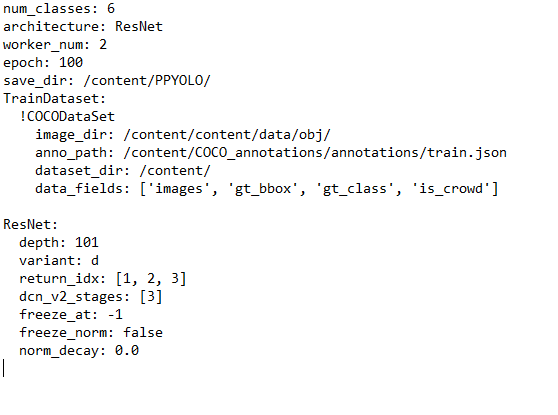

In [99]:
!python /content/PaddleDetection/tools/train.py -c /content/PaddleDetection/configs/custom_dataset/custom_train.yml  -o use_gpu=false

/usr/local/lib/python3.7/dist-packages/IPython/utils/module_paths.py:29: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(key, collections.Hashable):
loading annotations into memory...
Done (t=0.09s)
creating index...
index created!

import numpy as np
from paddle.io import DataLoader, Dataset

class RandomDataset(Dataset):
    def __getitem__(self, idx):
        data = np.random.random((2, 3)).astype('float32')

        return data

    def __len__(self):
        return 10

dataset = RandomDataset()
loader = DataLoader(dataset, batch_size=1)
data = next(loader())

In Paddle <= 2.0, data is in format '[Tensor(shape=(1, 2, 3), dtype=float32)]', and in Padd

In [100]:
!python /content/PaddleDetection/tools/train.py --help

/usr/local/lib/python3.7/dist-packages/IPython/utils/module_paths.py:29: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
usage: train.py [-h] [-c CONFIG] [-o [OPT [OPT ...]]] [--eval] [-r RESUME]
                [--slim_config SLIM_CONFIG] [--enable_ce ENABLE_CE] [--fp16]
                [--fleet] [--use_vdl USE_VDL] [--vdl_log_dir VDL_LOG_DIR]
                [--save_prediction_only]

optional arguments:
  -h, --help            show this help message and exit
  -c CONFIG, --config CONFIG
                        configuration file to use
  -o [OPT [OPT ...]], --opt [OPT [OPT ...]]
                        set configuration options
  --eval                Whether to perform evaluation in train
  -r RESUME, --resume RESUME
                        weights path for resume
  --slim_config SLIM_CONFIG
                        Configuration file of slim method.
  --enable_ce ENABLE_CE
                     